## Exercise #3
- Plot strip plots, histograms and boxplots of Annual Mean Temperature (temp_ann) at each of the four catchments with the highest number of fish sampling sites. Try to fit each type of graph in a single window (4 graphs per window - check how to do it in previous examples that are available in github).

In [1]:
# The following command tells the IPython environment to draw the plots immediately after the current cell - In new ipython versions it is the default (run just %matplotlib to cancel)
%matplotlib inline

import pandas as pd
import numpy as np
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [2]:
df = pd.read_csv('../exemplos/EFIplus_medit.zip',compression='zip', sep=";")

In [3]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
catchment_count.sort_values(by=['count'], ascending=False).head(4)

col_0,count
Catchment_name,
Ebro,736
Galiza-Norte,709
Minho,707
Tejo,509


In [4]:
# Apply the default theme
sns.set_theme()

### Strip plots

c:\Users\psegurado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\psegurado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\psegurado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit 

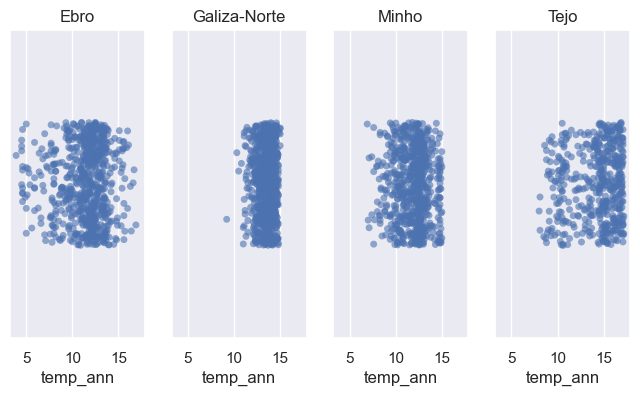

In [5]:
# 1st solution - code too long!
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(8, 4)) # number of graphs per column and line, share axis or not and figure size

dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

sns.stripplot(
    dfa["temp_ann"],
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    alpha=.6,
    ax=axs[0]
).set_title('Ebro')

sns.stripplot(
    dfb["temp_ann"],
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    alpha=.6,
    ax=axs[1]
).set_title('Galiza-Norte')

sns.stripplot(
    dfc["temp_ann"],
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    alpha=.6,
    ax=axs[2]
).set_title('Minho')

sns.stripplot(
    dfd["temp_ann"], 
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    alpha=.6,
    ax=axs[3]
).set_title('Tejo')
plt.show()

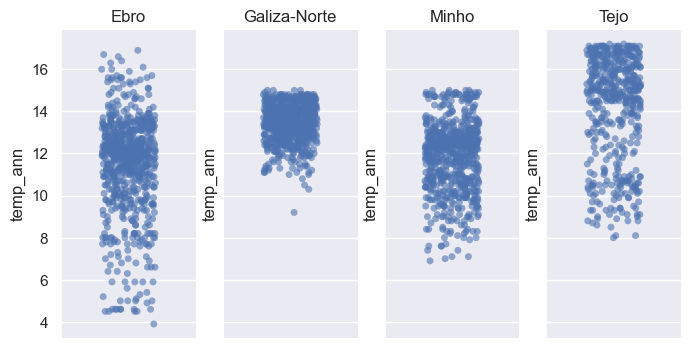

In [6]:
dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(8, 4)) # number of graphs per column and line, share axis or not and figure size

m = 0 # to iterate the name of the catchments (see code below)
for i, ax in zip(dfnames, axes.flat): # .flat() - numpy function  used as a 1_D iterator over N-dimensional arrays
# for loop with two variables
# numpy.ndarray.flat() function is used as a 1_D iterator over N-dimensional arrays. ax in axes.flat returns the location of each plot in the 2x2 plot window
    sns.stripplot(
    data= dfnames[i],
    y='temp_ann',
    jitter=0.2, # the ammount of jitter (i.e. random point dispersion along the x-axis).
    linewidth=0, # no line around the poits
    alpha=.6,
    ax=ax,
    ).set_title(label = catchnames[m])
    m = m+1 # in the next loop m=m+1 and the following catchment name will be set as the title
    ax.tick_params(bottom=False) # removes bottom tickmarks
sns.despine(bottom=True) # removes frame from plots; trim=True means that axis will be limited between min and max tick; offset defines space between axis and data.
plt.show()

#### histograms

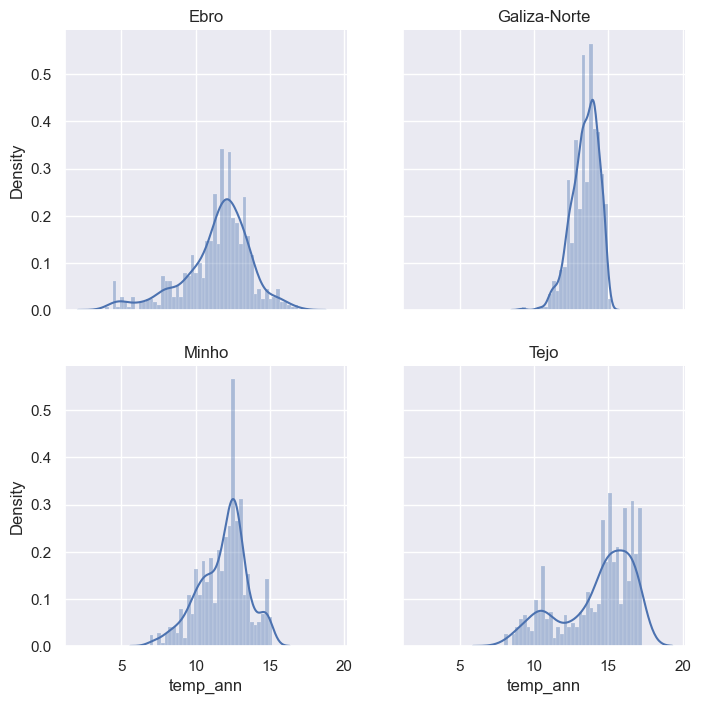

In [7]:

dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8)) # number of graphs per column and line, share axis or not and figure size

m = 0 # to iterate the name of the catchments (see code below)
for i, ax in zip(dfnames, axes.flat): 
# for loop with two variables
# numpy.ndarray.flat() function is used as a 1_D iterator over N-dimensional arrays. ax in axes.flat returns the location of each plot in the 2x2 plot window
    sns.histplot(
    data= dfnames[i]["temp_ann"],
    binwidth=0.25, # sets the width of each histogram bin (to uniformize the histograms among plots)
    kde=True, # insert Kernel Density Estimate
    kde_kws=dict(cut=3), # parameters controlling kde - defines the kde curve limits to be displayed
    stat="density", # method for the kde
    alpha=.4, # sets transparency
    edgecolor=(1, 1, 1, 0.4), # color of bar edges (red, green, blue, alpha) - white with o.4 transparency
    ax=ax # to display each plot at a time (loop)
    ).set_title(label = catchnames[m]) # set titles for each plot
    m = m+1 # in the next loop m=m+1 and the following catchment name will be set as the title

sns.despine() # removes frame from plots (check here for more: https://datagy.io/seaborn-despine/)
plt.show()

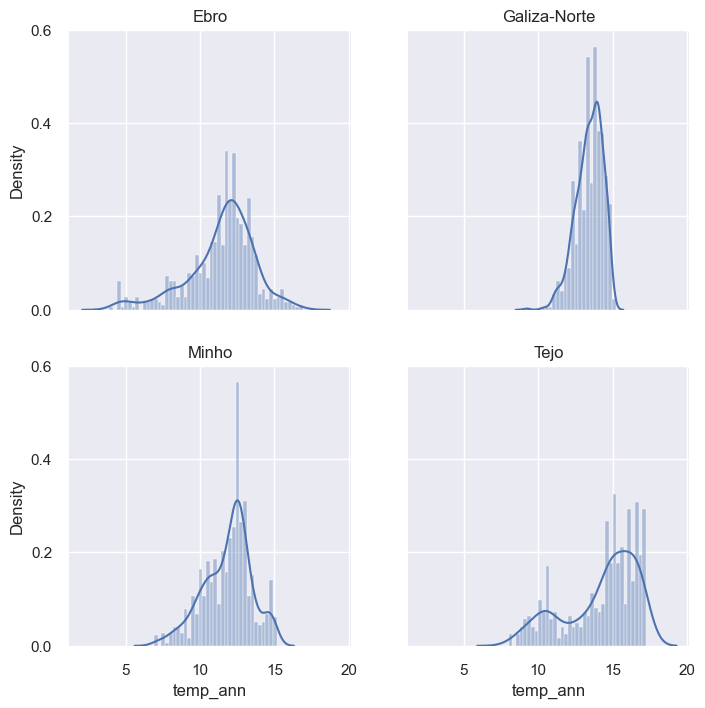

In [8]:
# same with some more "despine" and simplifications

dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8)) # number of graphs per column and line, share axis or not and figure size

m = 0 # to iterate the name of the catchments (see code below)
for i, ax in zip(dfnames, axes.flat): 
# for loop with two variables
# numpy.ndarray.flat() function is used as a 1_D iterator over N-dimensional arrays. ax in axes.flat returns the location of each plot in the 2x2 plot window
    sns.histplot(
    data= dfnames[i]["temp_ann"],
    binwidth=0.25, # sets the width of each histogram bin (to uniformize the histograms among plots)
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=None, # bar contour was removed
    ax=ax,
    ).set_title(label = catchnames[m])
    m = m+1 # in the next loop m=m+1 and the following catchment name will be set as the title

plt.yticks([0,0.2, 0.4, 0.6])
sns.despine(trim=True, offset=3) # removes frame from plots; trim=True means that axis will be limited between min and max tick; offset defines space between axis and data.



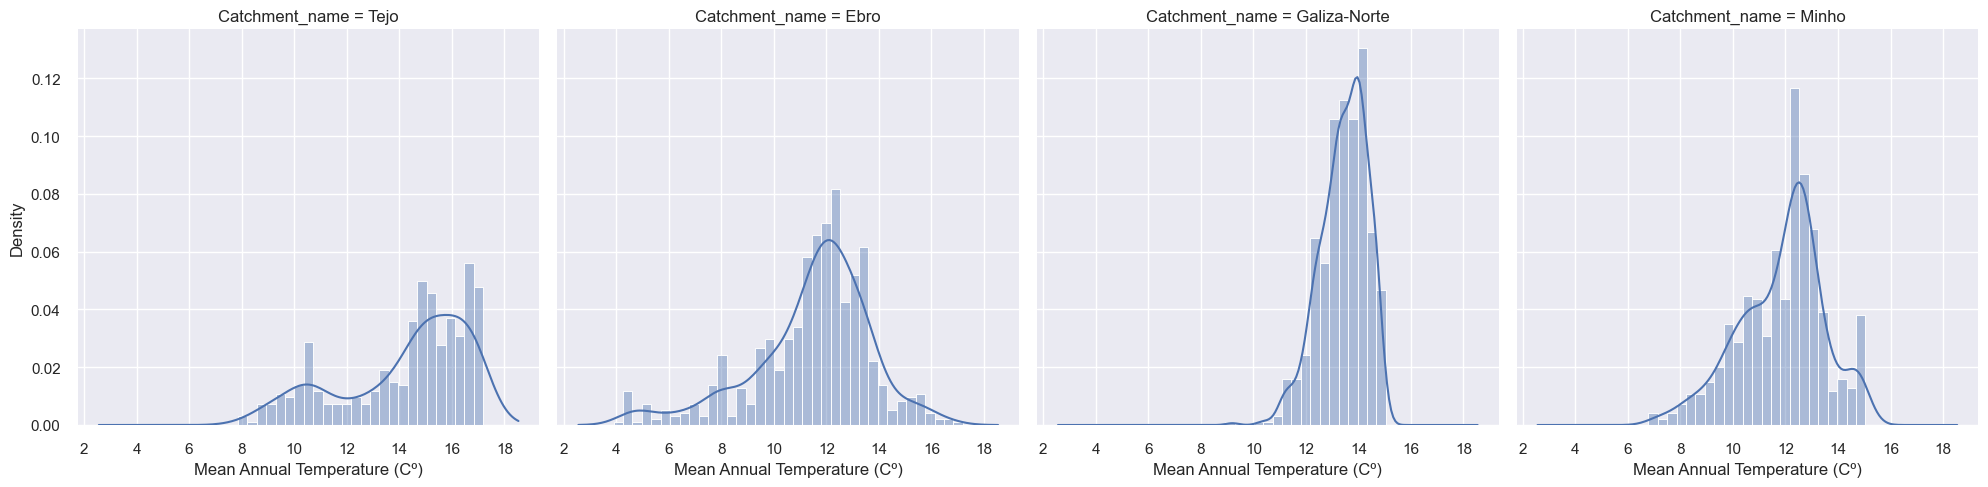

In [9]:
# With even less code (now with a similar function - seaborn.displot())

dfsub = df[(df['Catchment_name']=='Ebro') | 
    (df['Catchment_name']=='Galiza-Norte') |
    (df['Catchment_name']=='Minho') |
    (df['Catchment_name']=='Tejo')
    ]

sns.displot(
    data=dfsub,
    x='temp_ann',
    kde=True,
    col='Catchment_name',
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=None,
    ).set(xlabel ="Mean Annual Temperature (Cº)")
sns.despine(trim=True, offset=3)
plt.show()



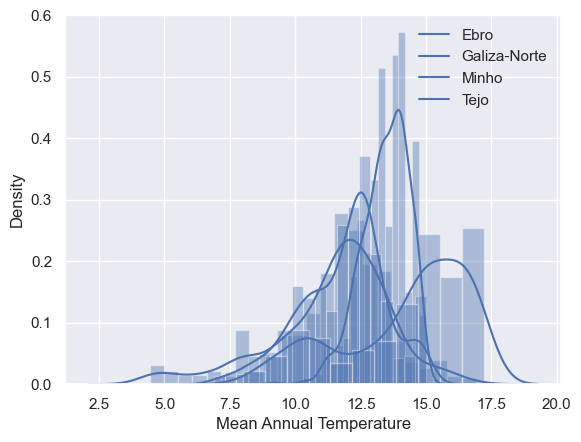

In [10]:
# all in a single plot

dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

k = 0
l = 0
m = 0
for i in dfnames:
    sns.histplot(
    data= dfnames[i]["temp_ann"], 
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.4,
    edgecolor=(1, 1, 1, 0.4),
    )
plt.xlabel('Mean Annual Temperature')
plt.legend(labels=catchnames, frameon=False) # insert a legend with no box
plt.show()

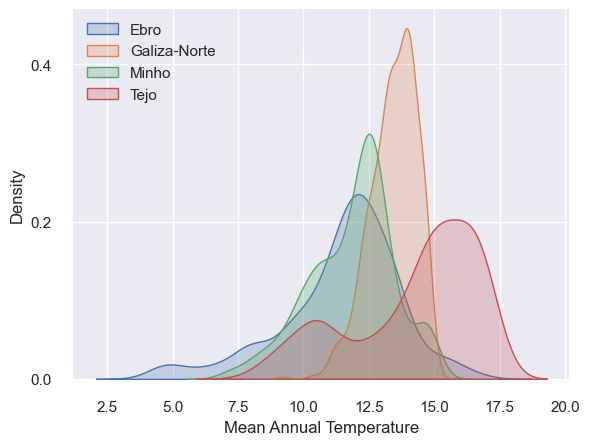

In [11]:
# all in a single plot - kde curve only

dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

k = 0
l = 0
m = 0
for i in dfnames:
    sns.kdeplot(
    data= dfnames[i]["temp_ann"],
    fill=True, # with filled curver; already transparent by default
    ).set_ylim(0, 0.47) # change limits by trial and error

plt.legend(labels=catchnames, frameon=False, loc='upper left') # insert a legend with no box in the upper left position
plt.yticks([0,0.2, 0.4])
plt.xlabel('Mean Annual Temperature')
sns.despine(trim=True, offset=6)

### Box plots

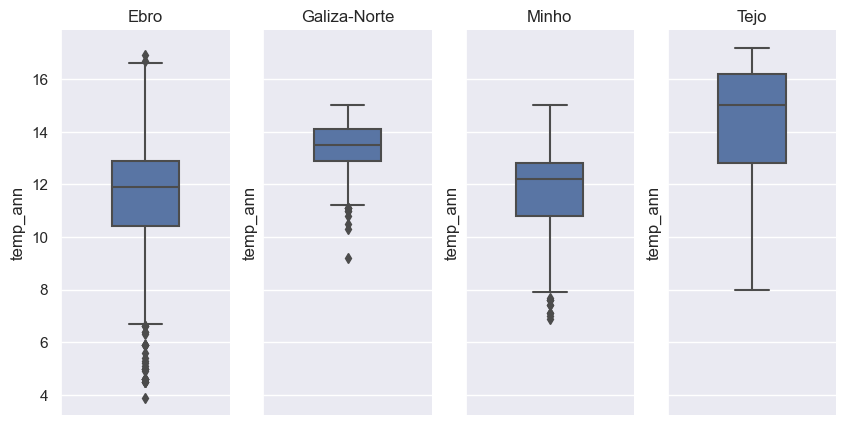

In [12]:
dfa = df[df['Catchment_name']=='Ebro']
dfb = df[df['Catchment_name']=='Galiza-Norte']
dfc = df[df['Catchment_name']=='Minho']
dfd = df[df['Catchment_name']=='Tejo']

dfnames={'1': dfa, '2': dfb,'3': dfc, '4': dfd}
catchnames = ['Ebro', 'Galiza-Norte', 'Minho', 'Tejo']

fig, axes = plt.subplots(1, 4, sharex=True, sharey=True, figsize=(10, 5)) # number of graphs per column and line, share axis or not and figure size

m = 0 # to iterate the name of the catchments (see code below)
for i, ax in zip(dfnames, axes.flat): 
# for loop with two variables
# numpy.ndarray.flat() function is used as a 1_D iterator over N-dimensional arrays. ax in axes.flat returns the location of each plot in the 2x2 plot window
    sns.boxplot(
    data= dfnames[i],
    y='temp_ann',
    width=0.4,
    ax=ax,
    ).set_title(label = catchnames[m])
    m = m+1 # in the next loop m=m+1 and the following catchment name will be set as the title
    ax.tick_params(bottom=False) # removes bottom tickmarks

sns.despine(bottom=True) # removes frame from plots; trim=True means that axis will be limited between min and max tick; offset defines space between axis and data.


#### Exercise 4.1

Take 1000 random samples with replacement of increasing sample sizes (e.g. 10, 50, 100, 150, 200, 250, 300, 500 and 1000 observations), compute the mean Temp_ann of each sample and use an appropriate visualization to show how many samples will we need to have a good estimate of the population mean (this is a corrected version of the last challenge of the previous exercise).


[[13.344444444444443, 12.860000000000003, 14.09, 14.344444444444447, 13.6, 13.529999999999998, 13.333333333333334, 13.466666666666665, 11.899999999999999, 13.133333333333333, 13.45, 13.829999999999998, 13.160000000000002, 13.080000000000002, 12.919999999999998, 13.97777777777778, 12.620000000000001, 12.65, 14.299999999999999, 13.75, 12.533333333333333, 13.811111111111112, 15.157142857142857, 14.325, 12.53, 13.4, 12.429999999999998, 13.419999999999998, 13.639999999999997, 13.41, 13.38888888888889, 14.089999999999998, 13.809999999999999, 14.0, 14.055555555555555, 12.970000000000002, 13.430000000000001, 13.64, 13.05, 12.819999999999999, 12.577777777777776, 14.0, 14.099999999999998, 13.222222222222221, 12.779999999999998, 12.76, 13.780000000000001, 13.239999999999998, 12.45, 13.588888888888889, 13.2, 12.24, 13.1, 14.26, 14.38, 12.7, 12.222222222222221, 12.86, 12.833333333333332, 13.040000000000001, 11.733333333333333, 13.520000000000001, 13.76, 13.41, 12.988888888888889, 14.355555555555554

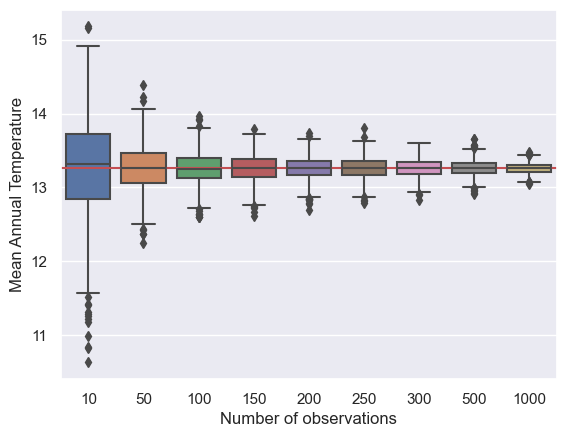

In [13]:
import random

num = [10, 50, 100, 150, 200, 250, 300, 500, 1000] 

temp = df['temp_ann']
means = []

for i in num:
    # Generating seed so that we can get same result every time the loop is run...
    np.random.seed(24)
    # a loop that takes a random sample with i observations from temp and computes the mean, ...
    # ... and repeat the process 1000 times
    x = [np.mean( # compute mean
        temp.take( # from temp ...
        np.random.randint(0, len(temp), i)) # ... take a random sample of i observations ...
        ) for _ in range(1000)] # ... 1000 times.
    means.append(x)

print(means) # means is a list of 9 lists with 1000 observations (means) each.
type(means)

# Produce boxplots
ax = sns.boxplot(data= means)
ax.set_xticklabels(num) # change x-axis tick labels
ax.set_xlabel('Number of observations')
ax.set_ylabel('Mean Annual Temperature') 
plt.axhline(y=np.mean(df['temp_ann']), color='r', linestyle='-') # plot line of mean Temp_ann using all data
plt.show()